<a href="https://colab.research.google.com/github/Jenil020/python/blob/main/classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Classification Analysis (classify new data into number of class or group)
# Two types (Binary and Multi class classification)
# Two types of algrorithm (Non-Liner [K-NN , SVM , Naivi Bayes , Desision tree])
# (Liner [Logistici Regression , Support Vector Machine])
# For check accuracy three method (Log loss entropy , confusion matrix , AUC-ROC curve)


In [1]:
#Logistic regression (Liner seperable data [binomial , multinomial , ordinal])
#Use Sigmoid Func. --> y = 1/(1+e*-x) if multiple x then x = m1x1+m2x2..+b
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files


# Upload the file
uploaded = files.upload()

# Load it using the correct filename
df = pd.read_csv('classification.csv')
df.head(3)

Saving classification.csv to classification.csv


,ID,CGPA,Experience,Department,Placed
0,1,7.00,0,CS,0
1,2,9.30,3,CS,1
2,3,8.43,4,EC,1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

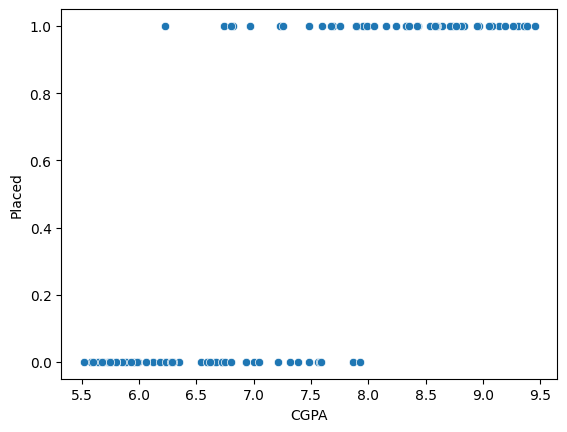

In [ ]:
sns.scatterplot(x="CGPA",y="Placed", data=df ) #check data is applicable for logistic..
x= df[["CGPA" , "Experience"]] # this is only 1d array but it expect 2d array hence we need to reshape it in 2d array later
y= df["Placed"]

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

lr= LogisticRegression()
lr.fit(x_train ,y_train)

lr.score(x_test,y_test)

lr.predict([[7 , 0]])


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


(array([[2.28903415, 0.89321229]]), array([-18.55010263]))

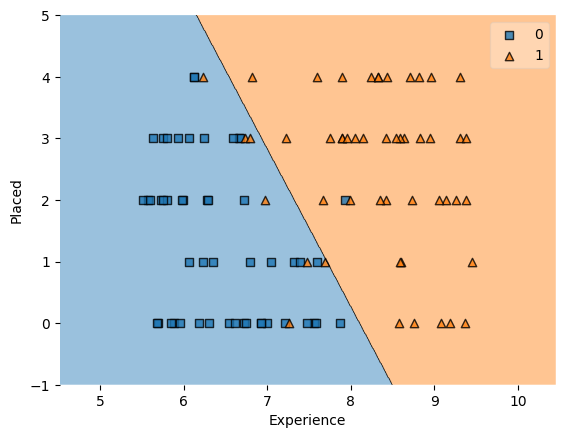

In [ ]:
sns.scatterplot(x="Experience",y="Placed", data=df )
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.values, y.values, clf=lr)

lr.coef_ , lr.intercept_ #two coeff bcoz y = m1x1 + m2x2 + b(intercept)



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: xlabel='CGPA', ylabel='Experience'>

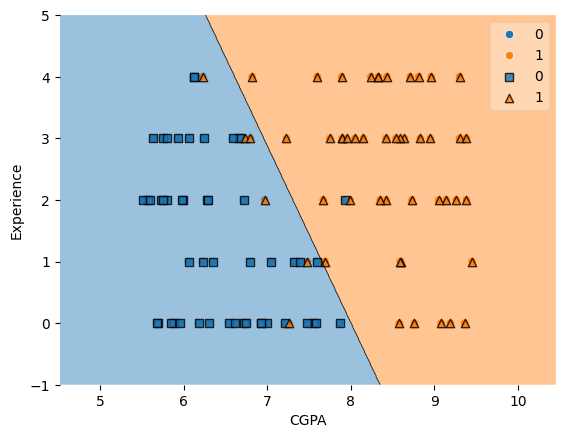

In [ ]:
sns.scatterplot(x="CGPA" , y="Experience", data=df, hue="Placed")


x= df[["CGPA" , "Experience"]] # this is only 1d array but it expect 2d array hence we need to reshape it in 2d array later
y= df["Placed"]

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

pf = PolynomialFeatures(degree=3) # Convert input data into polimomial feature
pf.fit(x)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

lr= LogisticRegression()
lr.fit(x_train ,y_train)

lr.score(x_test,y_test)*100

lr.predict([[7 , 0]])

from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.values, y.values, clf=lr)


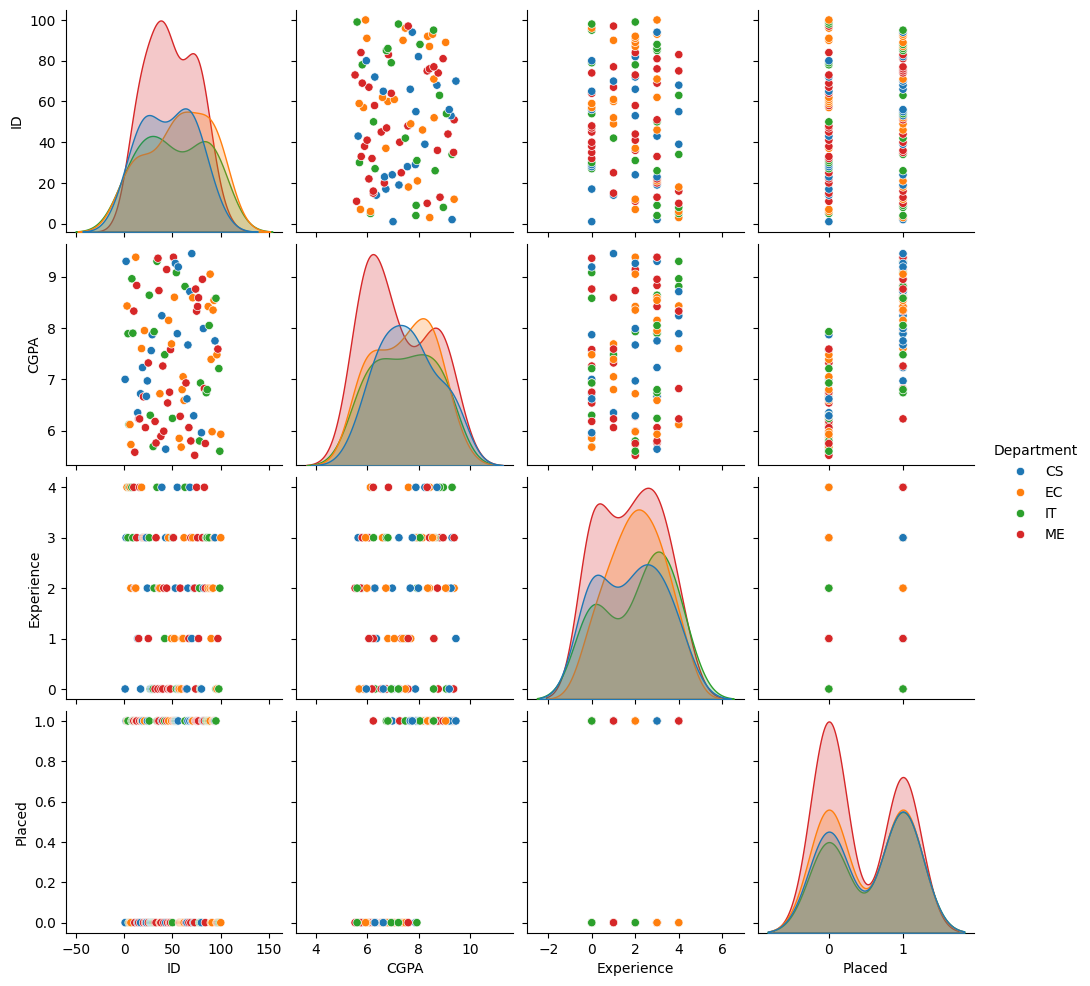

In [ ]:
#OVR(one vs rest) for multinomial regression (ovr convert in binomial)
df.head(3)
df["Department"].unique()
sns.pairplot(data=df , hue="Department")
plt.show() # see curvature which is not much overlap is best for selection
#In this data all are more overlap to each other but select feture which is not more overlap


In [ ]:
x= df[["CGPA" , "Experience"]]
y= df["Department"]

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

lr = LogisticRegression(multi_class="ovr") #OVR method applied
# lr = LogisticRegression(multi_class="multinomial")
lr.fit(x_train , y_train)

lr.score(x_test,y_test)*100

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


15.0

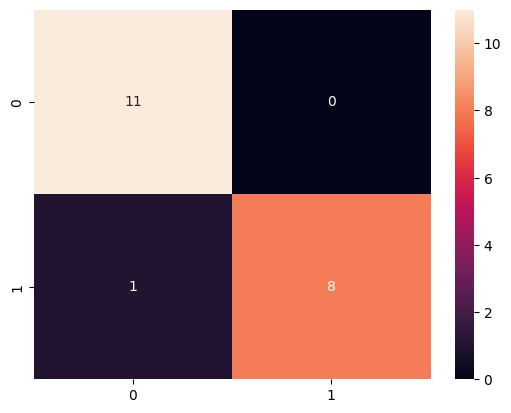

In [ ]:
#Confusion mtrix for increase accuracy of logistic model (in linear regression we use loss function)
# error marix used to understand perfermonce of classification model
#generate a matrix betn actual output and predicted output
#(true nagative , true positive , false nagative , false positive) hense accuracy = tn + tp /(tn + tp + fn + fp)
# fn (type 2 error) if it is higer then model will be rejected fp is type 1 error
# sensitivity
# precision : tp/(tp+fp) high precision value less type 1 error (fp)
# recall :  tp/(tp+fn) how many sample is positive in model
#f1-socre : 2 * (precision *recall / precision + recall) High is better for model

x = df[["CGPA" , "Experience"]]
y = df["Placed"]

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

lr = LogisticRegression()
lr.fit(x_train , y_train)

lr.score(x_test,y_test)*100

from sklearn.metrics import confusion_matrix , precision_score , recall_score , f1_score
y_pred = lr.predict(x_test)
cm = confusion_matrix(y_test , y_pred)
sns.heatmap(cm , annot=True) #Confusion matrix graph
plt.show()

# precision_score(y_test , y_pred)
# recall_score(y_test , y_pred)
# f1_score(y_test , y_pred)


In [ ]:
# Handle Imbalance data (remove a biasness in output)
#Random Under sampling (reduce majoity data to same as minority)
#Random Over sampling (Increase size of minority to same as majority)
df["Placed"].value_counts() #here data is same for placed or non placed so data is balanced
# but if not balanced then
from imblearn.under_sampling import RandomUnderSampler
# from imblearn.over_sampling import RandomOverSampler

ru = RandomUnderSampler()
x = df[["CGPA" , "Experience"]]
y = df["Placed"]

x_res , y_res = ru.fit_resample(x,y)


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x_train,x_test,y_train,y_test = train_test_split(x_res,y_res,test_size=0.2)

lr = LogisticRegression()
lr.fit(x_train , y_train)
lr.score(x_test,y_test)*100

90.0

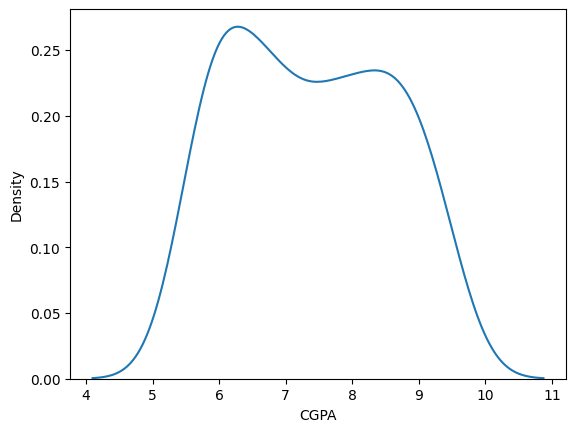

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


<Axes: >

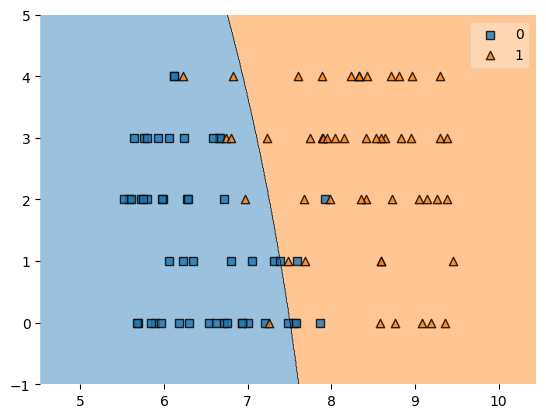

In [ ]:
#Naivy Bias (classification based on probability)
# p(r or b) = p(b/r).p(r) = p(r A b) (A is intersection)
# p(a/b) = (p(b/a).p(a))/p(b) ---> Bayes theorm
#gaussian type (input data is in normal distribution nature)
#Bernouli type (input data is only in zero or one (data is encoded))
#mltinomial type (decret data , textual input , data is not in normal distribution)

x = df[["CGPA" , "Experience"]]
y = df["Placed"]

sns.kdeplot(data=df["CGPA"]) #for check data is nonmal distribution or not
plt.show()

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB , BernoulliNB , MultinomialNB

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
nb = GaussianNB()
nb.fit(x_train , y_train)
nb.score(x_test,y_test)*100

plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=nb)


80.0

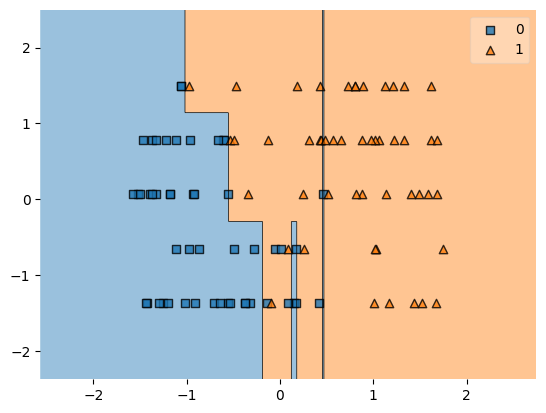

In [ ]:
#Decision tree (used for classification as well in regression)
#Cart algorithm (classification and regression tree algorithm)
#used when data is non liner seperable
#(root node)-->descision node--> Leaf node
# splitting(create a subnode) , pruning(remove subnode)
#Entropy (impurity) which has low entropy is become a root node
#information gain (less entropy means high information gain)

x = df[["CGPA" , "Experience"]]
y= df["Placed"]

from sklearn.preprocessing import StandardScaler

sc = StandardScaler() # here we dont need to scale data but if we have vary large range between two coloumn then do it (age , salary)
x = sc.fit_transform(x)

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

dt = DecisionTreeClassifier(criterion="entropy",max_depth=5)
dt.fit(x_train , y_train)
dt.predict([[7,0]])

# from sklearn.tree import plot_tree
# plt.figure(figsize=(15,15))
# plot_tree(dt)

plot_decision_regions(x, y.to_numpy(), clf=dt)
dt.score(x_test,y_test)*100



In [ ]:
for i in range(1,20):
  dt = DecisionTreeClassifier(criterion="entropy",max_depth=i)
  dt.fit(x_train , y_train)
  print(i , dt.score(x_test,y_test)*100)

1 90.0
2 90.0
3 95.0
4 95.0
5 90.0
6 90.0
7 90.0
8 90.0
9 90.0
10 90.0
11 90.0
12 90.0
13 90.0
14 90.0
15 90.0
16 90.0
17 90.0
18 90.0
19 90.0


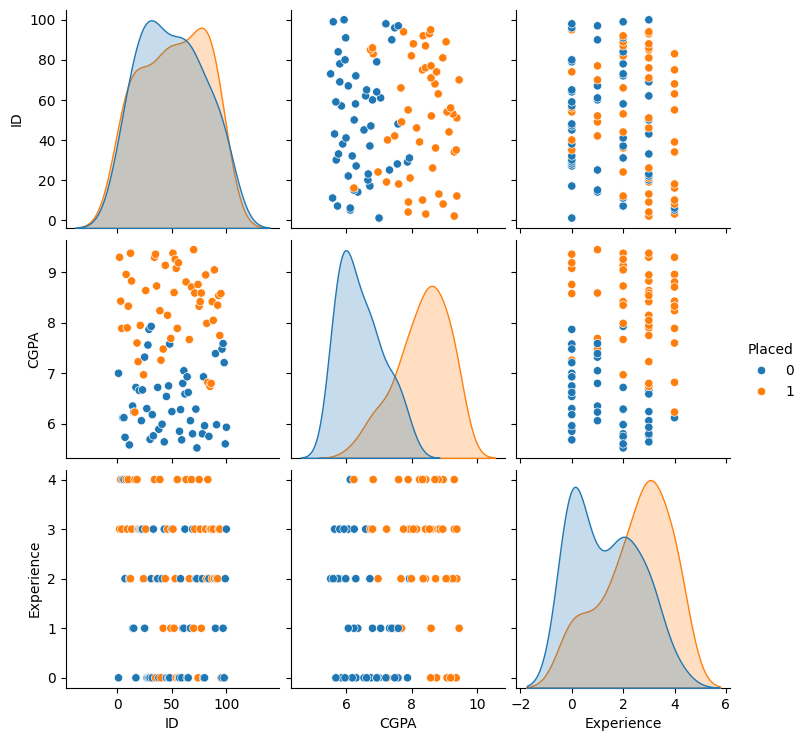

In [ ]:
x= df[["CGPA" , "Experience"]]
y= df["Placed"]

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

dt = DecisionTreeRegressor()
dt.fit(x_train , y_train)
dt.score(x_test,y_test)*100

sns.pairplot(data=df , hue="Placed")
plt.show()


<Axes: >

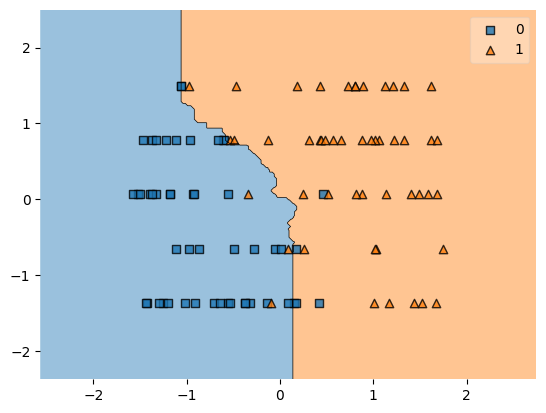

In [ ]:
# KNN (K nearest neighbour)
#used for both classification as well regression
#manhatten distance : l = |x2-x1|+|y2-y1| euclidean dis = l = V(x2-x1)*2 + (y2-y1)*2)

x = df[["CGPA" , "Experience"]]
y= df["Placed"]

# scalling input data only if needed
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
kn = KNeighborsClassifier(n_neighbors=5 , p=1) #p=1 it means manhatten distance for find distance by default euclidean dist. consider
kn.fit(x_train , y_train)
kn.score(x_test,y_test)*100

for i in range(1,50):
  kn = KNeighborsClassifier(n_neighbors=i , p=1)
  kn.fit(x_train , y_train)

kn.predict([[6.10,0]])

plot_decision_regions(x, y.to_numpy(), clf=kn)


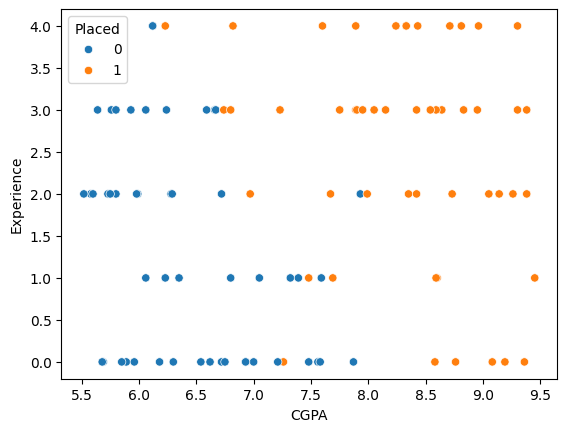

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


<Axes: >

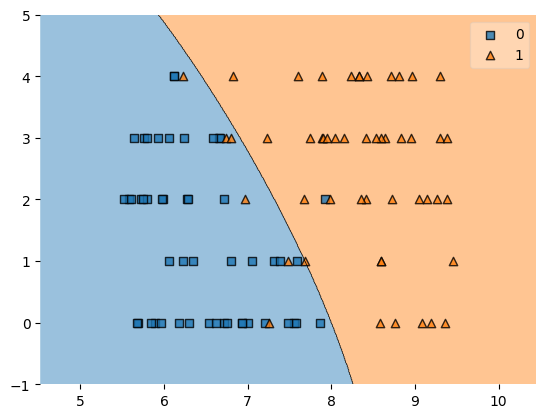

In [13]:
#support vector machine (classification and regression both)
#the algorithm find a hyperplane that generalize better to unseen data and robust to outliers
#hard margin allow misclassification(some data in hyper plane), soft margin dosent allow ,
#Logistic only support linear classification , svm support both linear as well non linear
#SVM support non-liner classification using kernal(add new features so convert in multidimensional space)
# kernal func (linear , polinomial , gaussian , sigmoid) check one by one kernal func to check which is best fit

x = df[["CGPA" , "Experience"]]
y= df["Placed"]

sns.scatterplot(x="CGPA" , y="Experience" , data=df , hue="Placed")
plt.show()  #fro check data is linearly seperable or not

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
svm = SVC(kernel="rbf") #linear , poli , sigmoid , rbf
svm.fit(x_train , y_train)
svm.score(x_test,y_test)*100

svm.predict([[9.30,3]])

# for i in range(1,50):
#   svm = SVC(kernel="rbf" , degree=i)
#   svm.fit(x_train , y_train)
#   print(i , svm.score(x_test,y_test)*100)

plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=svm)


In [6]:
df.head(3)


,ID,CGPA,Experience,Department,Placed
0,1,7.00,0,CS,0
1,2,9.30,3,CS,1
2,3,8.43,4,EC,1


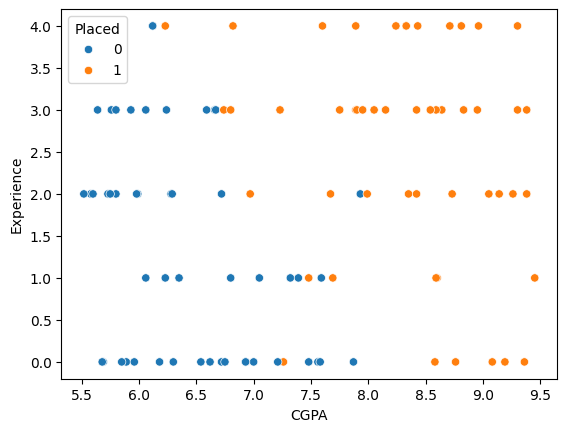

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


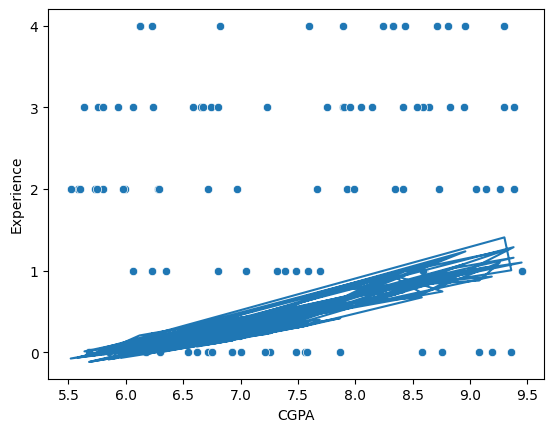

In [24]:
#Support vector machine for regression (find decision boundry in such as way so margin is less and pass hyperplane at d/2)

x = df[["CGPA" , "Experience"]]
y= df["Placed"]

sns.scatterplot(x="CGPA" , y="Experience" , data=df , hue="Placed")
plt.show() #here data is in non linear form but still we try svm for regressor

from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
svm = SVR(kernel="poly")
svm.fit(x_train , y_train)
svm.score(x_test,y_test)*100

svm.predict([[9.30,3]])
# plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=svm)
sns.scatterplot(x="CGPA" , y="Experience" , data=df)
plt.plot(df["CGPA"] , svm.predict(x)) # it will draw prediction line
plt.show()


In [30]:
#Hyper Parameter Tuning
#modal parameter (ex y = mx +c here m and c is modal para)
#hyperparameter (parameter that are explicitly defined by user ex: kernal="poly")
# 1 method (gridSearchCV [find best parameter from given set of grid parameter])
# 2 method (randomizeSerachedCV [find random set of parameters])

x = df[["CGPA" , "Experience"]]
y= df["Placed"]

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

svm = SVC()
svm.fit(x_train , y_train)
svm.score(x_test,y_test)*100

gd = {"kernel" : ['linear', 'poly', 'rbf', 'sigmoid']}
gs = GridSearchCV(svm , gd)
gs.fit(x_train , y_train)
gs.best_params_


{'kernel': 'linear'}

In [34]:
#Cross Validation
#technique for validate model efficiency by splitting data (training and testing)
#Leave p Out cross- validation (p for testing , n-p for training , process continue till all p pair tested)
#Leave one out cross-validation (best method but slow , 1 for test , n-1 for train , process continue till all n test)
#k fold cross validation (data is divide into k part , k-1 is for train , 1 is for test)
#stratified k-fold : (only for classification/unbalanced data)

x = df[["CGPA" , "Experience"]]
y= df["Placed"]

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import KFold , StratifiedKFold

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

svm = SVC()
svm.fit(x_train , y_train)

# kf = KFold(n_splits=5)

# for train , test in kf.split(x,y):
#   print(train , test)

from sklearn.model_selection import cross_val_score
p = cross_val_score(svm , x , y , cv=KFold(5))
p*100





array([ 95.,  85.,  90., 100.,  85.])